# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

Análise Exploratória em Conjunto de Dados do Kaggle


In [20]:
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

sns.set_style(style='whitegrid')
plt.rcParams.update({'font.size': 13, "figure.figsize" : [12,5]})

In [14]:
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [15]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

## 1) Distribuição de Veículos com base no Ano de Registro

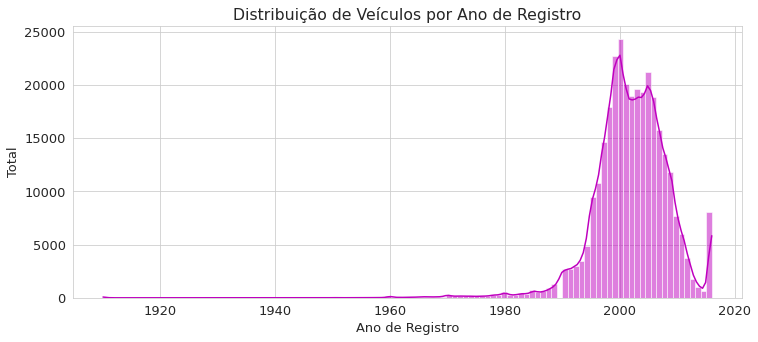

In [50]:
sns.histplot(x = df['yearOfRegistration'],bins=110, kde=True, color = "m")

plt.title("Distribuição de Veículos por Ano de Registro")
plt.xlabel("Ano de Registro")
plt.ylabel("Total")

plt.show()

In [94]:
df['price'].max()

28800

## 2) Variação da faixa de preço pelo tipo de veículo

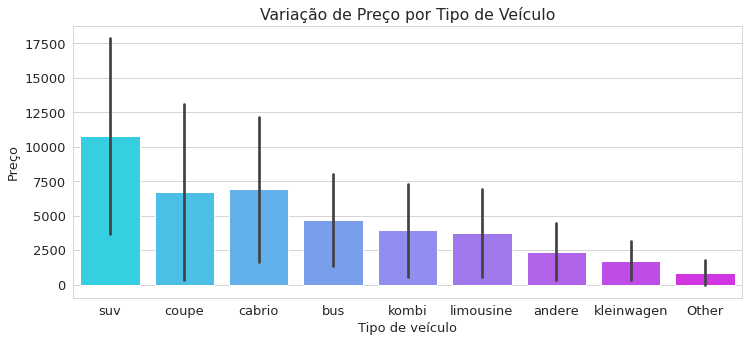

In [120]:
sns.barplot(data= df.sort_values(by='price', ascending=False), 
           x='vehicleType', y='price',
           palette = 'cool',ci='sd' )

plt.title("Variação de Preço por Tipo de Veículo")
plt.xlabel("Tipo de veículo")
plt.ylabel("Preço")

plt.show()

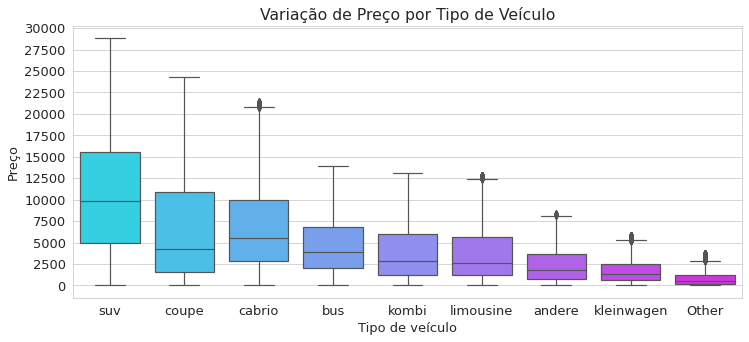

In [138]:
sns.boxplot(data= df.sort_values(by='price', ascending=False), 
           x='vehicleType', y='price',
           palette = 'cool', 
           linewidth = 1.2 )

plt.locator_params(axis='y', nbins=13)

plt.title("Variação de Preço por Tipo de Veículo")
plt.xlabel("Tipo de veículo")
plt.ylabel("Preço")

plt.show()

## 3) Contagem total de veículos à venda conforme o tipo de veículo

In [192]:
df_vehicle_type = df.groupby('vehicleType')[['vehicleType']].count()
df_vehicle_type.rename(columns = {'vehicleType':'Total'}, inplace = True)
df_vehicle_type.sort_values('Total', ascending=False, inplace = True)

df_vehicle_type['Total %'] = (df_vehicle_type['Total']/df_vehicle_type['Total'].sum()*100).map("{:.2f} %".format)
df_vehicle_type

,Total,Total %
vehicleType,,
limousine,84077,26.80 %
kleinwagen,69334,22.10 %
kombi,60195,19.19 %
bus,26833,8.55 %
cabrio,20388,6.50 %
Other,19447,6.20 %
coupe,16920,5.39 %
suv,13585,4.33 %
andere,2908,0.93 %


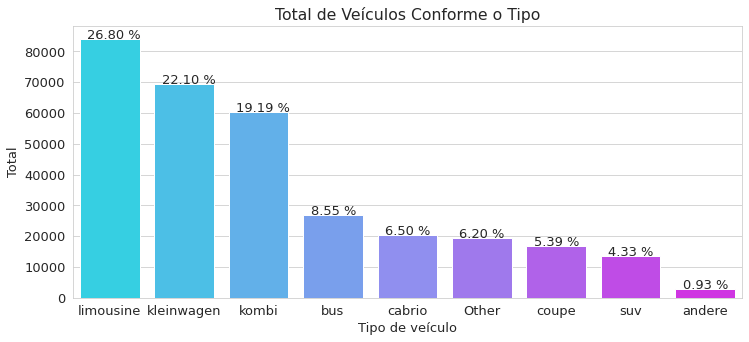

In [216]:
sns.barplot(x=df_vehicle_type.index, data= df_vehicle_type, y='Total',
           palette = 'cool')

j=-.3
for i in range(len(df_vehicle_type)):
    plt.text(j,(df_vehicle_type['Total'][i]) + 100,df_vehicle_type['Total %'][i])
    j+=1
    
plt.title("Total de Veículos Conforme o Tipo")
plt.xlabel("Tipo de veículo")
plt.ylabel("Total")

plt.show()


## 4) Número de veículos pertencentes a cada marca

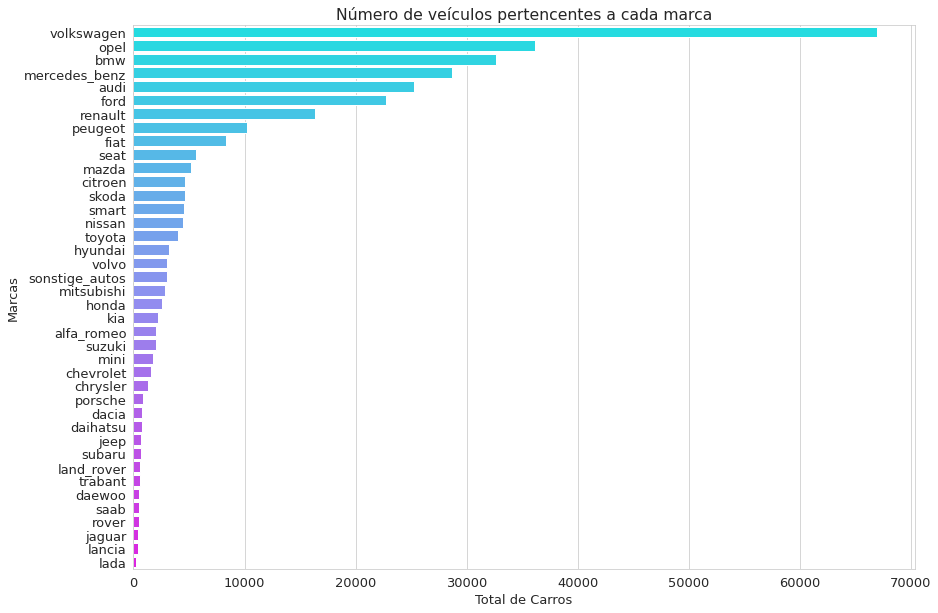

In [220]:
plt.figure(figsize=(14,10))

sns.countplot(data = df, 
              y = 'brand',
              order = df['brand'].value_counts().index,
              palette = 'cool')

plt.xlabel("Total de Carros")
plt.ylabel("Marcas")
plt.title("Número de veículos pertencentes a cada marca")

plt.show()

## 5) Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

In [257]:
gearbox = {'automatik':'Automatico',
          'manuell':'Manual',
          'Unspecified':'Não especificado'}

In [231]:
group_type_gearbox_mean= df[['vehicleType','price','gearbox']].groupby(["gearbox","vehicleType"])['price'].mean()

df_group_type_gearbox_mean = pd.DataFrame(group_type_gearbox_mean)
df_group_type_gearbox_mean = df_group_type_gearbox_mean.sort_values(by= 'price',ascending=False)
df_group_type_gearbox_mean = df_group_type_gearbox_mean.reset_index()
df_group_type_gearbox_mean.replace({'gearbox':gearbox},inplace = True)

df_group

,gearbox,vehicleType,price
0,automatico,suv,12631.579861
1,automatico,coupe,9546.569811
2,manual,suv,9379.936829
3,automatico,cabrio,9014.381548
4,manual,cabrio,6448.555657
5,Não especificado,suv,6073.769006
6,automatico,bus,5719.686344
7,manual,coupe,5642.117982
8,automatico,kombi,5211.097242
9,automatico,limousine,4907.464613


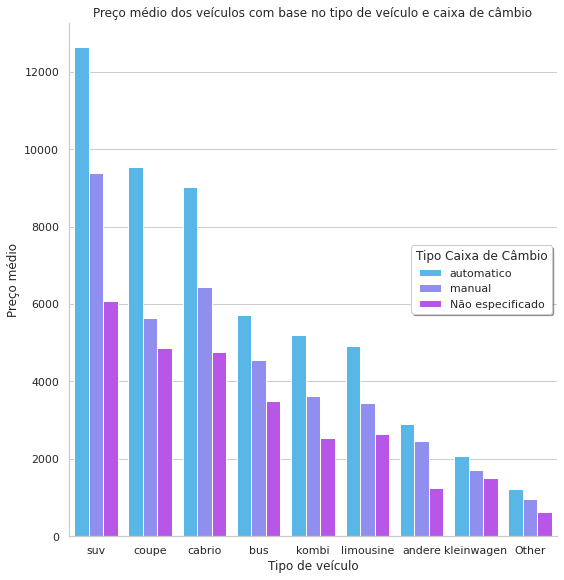

In [235]:
sns.catplot(x ='vehicleType', 
            y='price', 
            hue='gearbox',
            data = df_group,
            kind='bar', 
            height=8,
            palette='cool', 
            legend=False
           )

plt.title("Preço médio dos veículos com base no tipo de veículo e caixa de câmbio")
plt.ylabel("Preço médio")
plt.xlabel("Tipo de veículo")

plt.legend(title='Tipo Caixa de Câmbio', loc = 5,shadow=True)

plt.show()

## 6) Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

In [243]:
fuel_type = {'Hybrid':'Hibrido',
            'Electric':'Elétrico',
            'Gasoline':'Gasolina',
            'Other':'Outro',
            'Lpg':'Gnl',
            'Cng':'Gnp'}

In [248]:
group_type_fuelType_mean= df[['gearbox','price','fuelType']].groupby(["fuelType","gearbox"])['price'].mean()

df_group_type_fuelType = pd.DataFrame(group_type_fuelType_mean)
df_group_type_fuelType = df_group_type_fuelType.sort_values(by= 'price',ascending=False)
df_group_type_fuelType = df_group_type_fuelType.reset_index()
df_group_type_fuelType.replace({'fuelType':fuel_type},inplace = True)
df_group_type_fuelType.replace({'gearboxe':gearbox},inplace = True)

df_group.head()

,fuelType,gearbox,price
0,Hibrido,automatik,8904.259615
1,Diesel,automatik,7998.659897
2,Elétrico,automatik,5862.105263
3,Gnl,automatik,5539.479830
4,Diesel,manuell,5221.182161


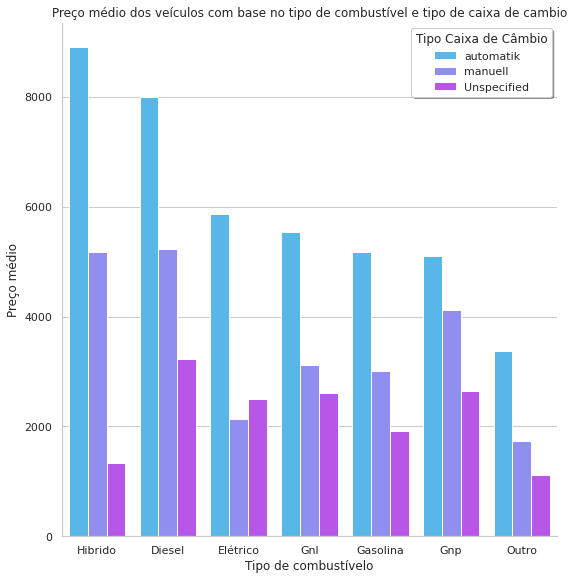

In [252]:
sns.catplot(x ='fuelType', 
            y='price', 
            hue='gearbox',
            data = df_group,
            kind='bar', 
            height=8,
            palette='cool', 
            legend=False
           )

plt.title("Preço médio dos veículos com base no tipo de combustível e tipo de caixa de cambio")
plt.ylabel("Preço médio")
plt.xlabel("Tipo de combustívelo")

plt.legend(title='Tipo Caixa de Câmbio', shadow=True)

plt.show()

## 7) Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

In [259]:
group_type_gearbox_mean= df[['vehicleType','powerPS','gearbox']].groupby(["gearbox","vehicleType"])['powerPS'].mean()

df_group_type_gearbox = pd.DataFrame(group_type_gearbox_mean)
df_group_type_gearbox = df_group_type_gearbox.sort_values(by= 'powerPS',ascending=False)
df_group_type_gearbox = df_group_type_gearbox.reset_index()
df_group_type_gearbox.replace({'gearbox':gearbox},inplace = True)


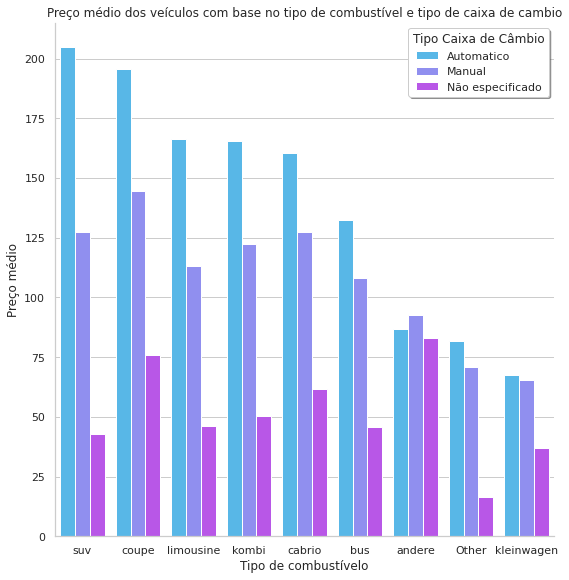

In [260]:
sns.catplot(x ='vehicleType', 
            y='powerPS', 
            hue='gearbox',
            data = df_group,
            kind='bar', 
            height=8,
            palette='cool', 
            legend=False
           )

plt.title("Preço médio dos veículos com base no tipo de combustível e tipo de caixa de cambio")
plt.ylabel("Preço médio")
plt.xlabel("Tipo de combustívelo")

plt.legend(title='Tipo Caixa de Câmbio', shadow=True)

plt.show()

## 8) Preço médio de um veículo por marca, bem como tipo de veículo

In [377]:
group_brand_type_mean= df[['vehicleType','price','brand']].groupby(["brand","vehicleType"])['price'].mean()

df_group_brand_type = pd.DataFrame(group_brand_type_mean)
df_group_brand_type = df_group_brand_type.sort_values(by= 'price',ascending=False)
df_group_brand_type = df_group_brand_type.reset_index()
df_group_brand_type.replace({'gearbox':gearbox},inplace = True)

new_df = df_group_brand_type.pivot(index = 'brand', columns = 'vehicleType', values='price')
new_df.fillna(0,inplace=True)

new_df = new_df.astype(int)
new_df

vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669,962,0,7035,5265,1867,3312,2600,0
audi,1012,2685,3485,9655,11242,2582,5442,3829,18644
bmw,896,1720,4064,8613,6375,1575,5030,4838,12868
chevrolet,1250,3059,5188,10590,9991,2588,4143,4944,9613
chrysler,915,2919,2395,4160,8194,1666,3930,3191,5888
citroen,912,2248,4036,4536,2695,2274,3101,3379,10810
dacia,1674,3560,8370,0,0,3276,4166,3260,9761
daewoo,664,993,1262,900,428,1110,816,983,1900
daihatsu,614,1075,1201,7761,0,1402,3420,3329,2066


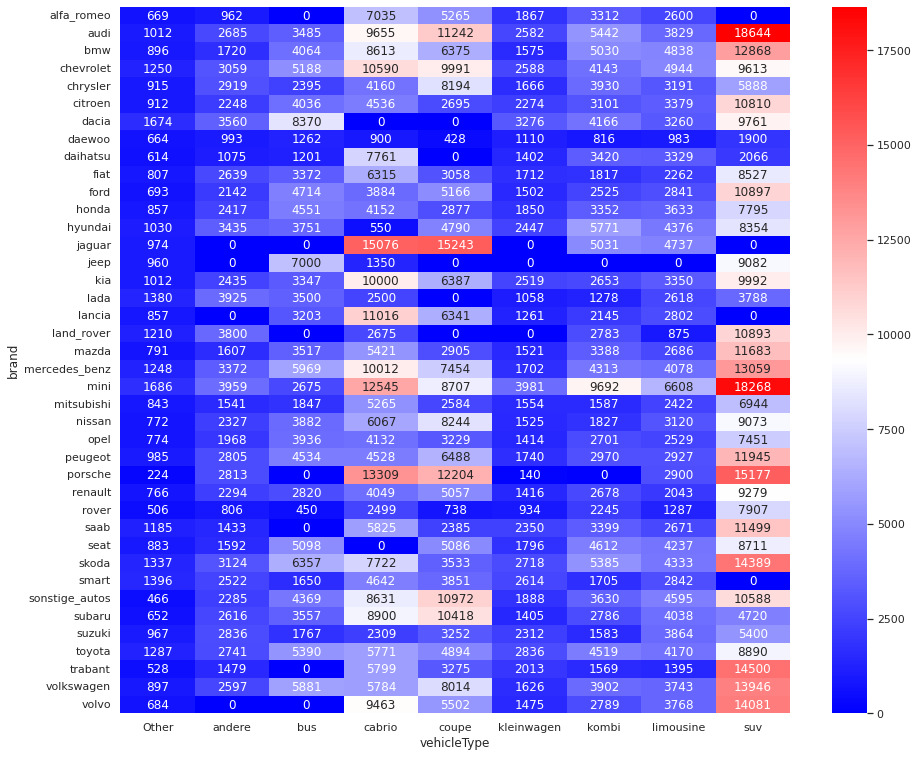

In [394]:
fig, ax = plt.subplots(figsize=(15,13))

sns.heatmap(new_df,annot=True,fmt="d",cmap = 'bwr')

plt.show()

# Fim